In [75]:
#Importing the needed packages
import scipy as sp
from scipy import stats
from scipy import integrate   # not included in basic scipy

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook   

In [76]:
#Defining initial conditions and parameters
E_tot = 10 #Will become random energy generated from boltzmann dist
k0 = 0.05
m = 2
phi = sp.stats.uniform.rvs(size=1)*2*sp.pi #choose a random phase
#Creates initial conditions given phase and parameters
x0 = (2*E_tot/k0)**(1/2) * sp.cos(phi)
v0 = (2*E_tot/m)**(1/2) * sp.sin(phi)
u0 = sp.array([sp.asscalar(x0),sp.asscalar(v0)])
print((2*E_tot/k0)**(1/2), (2*E_tot/m)**(1/2))
print(u0)

20.0 3.1622776601683795
[-1.97901553  3.14675824]


In [93]:
def k(t):
    k = k0 + 2*t
    return k

In [94]:
#Defining equation for SHM in system of equations
#Note switched so that these are not dimensionless variables
def shm(u,t):
    x = u[0]
    v = u[1]
    return (v,-(k(t)/m)*x)

In [95]:
#Defining the time interval I want this to take place over
#Getting the integration into an array
tf = 200
tn = 2001
dt = tf/(tn-1)
t = sp.linspace(0,tf,tn)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(shm,u0,t).T

<IPython.core.display.Javascript object>


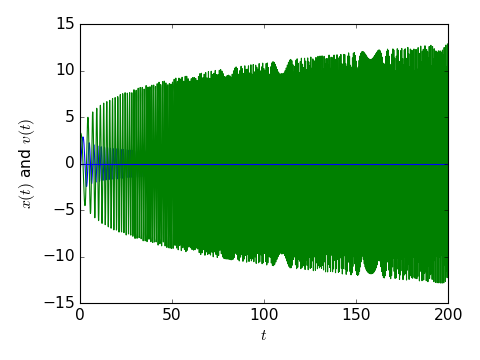

In [96]:
#Plot velocity and position vs time
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

In [88]:
#Check to make sure equal to u0
print([sp.amax(x),sp.amax(v)])

[6.4809536807472634, 6.1307940398311853]


In [97]:
#Calculating energy at each time step
for i in range (0,201):
    Energy = 1/2*m*v[i]**2 + 1/2*k(i*dt)*x[i]**2
    print(Energy)

10.0
10.3326220654
10.5600834969
10.7017694271
10.7774407761
10.8074722222
10.8128796469
10.8151321035
10.8357406886
10.895634248
11.0143415369
11.2090192954
11.4933871279
11.8766510555
12.3625173087
12.9484121369
13.6250283449
14.3763134514
15.1799932358
16.0086860822
16.8316119094
17.6168328059
18.3338887406
18.9566191026
19.4658964764
19.8519594834
20.1160199063
20.2708542447
20.3401684938
20.356645658
20.3587511832
20.3865451662
20.4769280033
20.6588972962
20.9494619602
21.3508669175
21.8496679445
22.4179863992
23.0169754439
23.6021775232
24.1301075629
24.5651097978
24.8853786226
25.0870533875
25.1855122126
25.2134060149
25.2155160724
25.2411278357
25.3351549166
25.5296132729
25.8371314504
26.2479326912
26.7311466162
27.2404831146
27.7233779772
28.1318926611
28.4331184231
28.6167562541
28.6979930065
28.7147257924
28.7194347304
28.7673001871
28.9031900981
29.1506169837
29.5055036685
29.9365878873
30.3927266524
30.8155845384
31.1546660977
31.3808197916
31.4944952556
31.5262330492
31.